<a href="https://colab.research.google.com/github/ShrivastavAbhishek2004/AIML_Training/blob/main/Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [ ]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


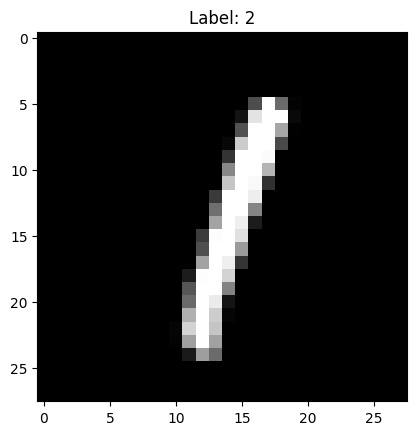

In [ ]:
#Visualize a sample
plt.imshow(x_test[5], cmap='gray')
plt.title(f"Label: {y_train[25]}")
plt.show()

In [ ]:
#Build the model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
from tensorflow.keras import datasets
print(dir(datasets))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'boston_housing', 'california_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8676 - loss: 0.4785 - val_accuracy: 0.9540 - val_loss: 0.1626
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9573 - loss: 0.1463 - val_accuracy: 0.9624 - val_loss: 0.1244
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9739 - loss: 0.0914 - val_accuracy: 0.9669 - val_loss: 0.1138
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9798 - loss: 0.0660 - val_accuracy: 0.9729 - val_loss: 0.0921
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9857 - loss: 0.0476 - val_accuracy: 0.9740 - val_loss: 0.0897


In [ ]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.0974
Test Accuracy: 97.31%


In [ ]:
# Make a prediction
predictions = model.predict(x_test)
print(f"Predicted Labeel: {predictions[0].argmax()}, True")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Labeel: 7, True


In [ ]:
from PIL import Image
import numpy as np


In [ ]:
model.save('neural.keras')

In [ ]:
#Load the trained model
newmodel = tf.keras.models.load_model('/content/neural.keras')

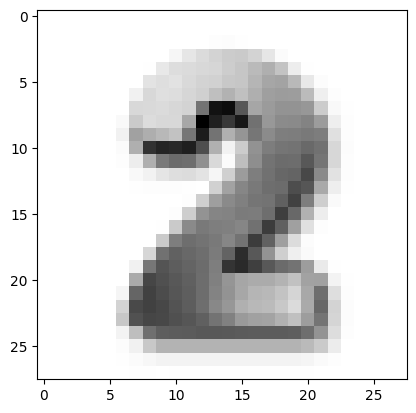

In [ ]:
# Load and preprocess the image
img = Image.open('/content/360_F_25853657_TZaY3PRevrRfVLhVwACDw1YxdmGQLXhf.jpg')
img = img.convert('L')
img = img.resize((28, 28))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
#Make a prediction
predictions = newmodel.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [ ]:
# Get the predicted label
predicted_label = np.argmax(predictions[0])
print(f"Predicted Label: {predicted_label}")

Predicted Label: 3
